# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [142]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [143]:
df = pd.read_csv("data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [144]:
df.shape

(165085, 4)

In [145]:
df['Date'].dtype

dtype('O')

In [146]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df.head(5)

,ID,Date,Element,Data_Value,year,month,day
0,USW00094889,2014-11-12,TMAX,22,2014,11,12
1,USC00208972,2009-04-29,TMIN,56,2009,4,29
2,USC00200032,2008-05-26,TMAX,278,2008,5,26
3,USC00205563,2005-11-11,TMAX,139,2005,11,11
4,USC00200230,2014-02-27,TMAX,-106,2014,2,27


In [147]:
(df["year"]==2015)

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19         True
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
165055    False
165056     True
165057    False
165058    False
165059     True
165060    False
165061    False
165062    False
165063    False
165064    False
165065    False
165066    False
165067    False
165068    False
165069    False
165070    False
165071    False
165072     True
165073    False
165074    False
165075    False
165076    False
165077    False
165078    False
165079    False
165080     True
165081    False
165082    False
165083    False
165084    False
Name: year, dtype: bool

In [148]:
#remove leap years
a=df[(df["month"]==2)&(df["day"]==29)]
#remove 2015 columns
b=df[(df["year"]==2015)]

df.drop(a.index,inplace=True)
df.drop(b.index,inplace=True)
df.head(5)

,ID,Date,Element,Data_Value,year,month,day
0,USW00094889,2014-11-12,TMAX,22,2014,11,12
1,USC00208972,2009-04-29,TMIN,56,2009,4,29
2,USC00200032,2008-05-26,TMAX,278,2008,5,26
3,USC00205563,2005-11-11,TMAX,139,2005,11,11
4,USC00200230,2014-02-27,TMAX,-106,2014,2,27


In [149]:
min1 = df[df['Element'] =='TMIN'].groupby('month').aggregate({'Data_Value':min})
df4 = b[b['Element'] =='TMIN'].groupby('month').aggregate({'Data_Value':min}) #2015 dataset
min1

,Data_Value
month,
1,-306
2,-288
3,-267
4,-117
5,-61
6,11
7,39
8,33
9,-21


In [150]:
max1= df[df['Element'] == 'TMAX'].groupby('month').aggregate({'Data_Value':max})
df3 = b[b['Element'] =='TMAX'].groupby('month').aggregate({'Data_Value':max}) #2015 dataset
max1

,Data_Value
month,
1,217
2,194
3,317
4,306
5,367
6,406
7,406
8,372
9,372


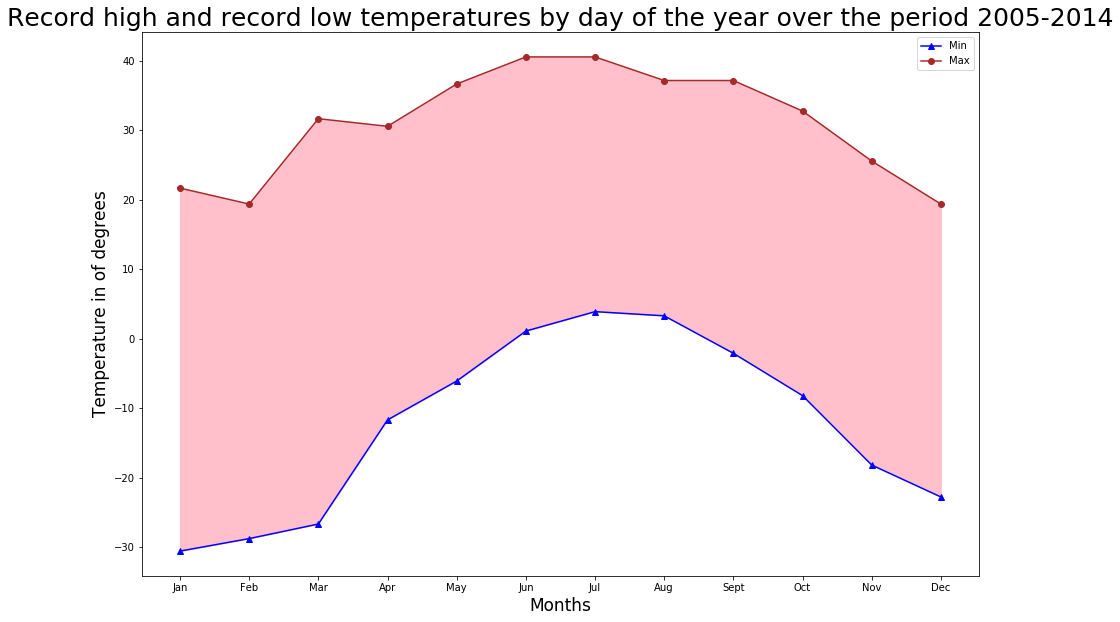

In [151]:
plt.figure(figsize=(15,10))
#line plot

plt.title('Record high and record low temperatures by day of the year over the period 2005-2014',fontsize=25)
plt.xlabel('Months',fontsize=17)
plt.ylabel('Temperature in of degrees',fontsize=17)
plt.xticks(np.arange(1,13,1),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'],fontsize=10)
plt.plot(min1.index,min1['Data_Value']/10,label='Min',marker='^',color='blue')
plt.plot(max1.index,max1['Data_Value']/10,label='Max',marker='o',color='brown')
plt.fill_between(max1.index,min1['Data_Value']/10,max1['Data_Value']/10, color='pink') 

plt.legend()
plt.show()

In [152]:
ans_max = df3[df3['Data_Value'] > (max1['Data_Value'])]
ans_min = df4[df4['Data_Value'] < (min1['Data_Value'])]
#print(ans_max)
#print(ans_min)

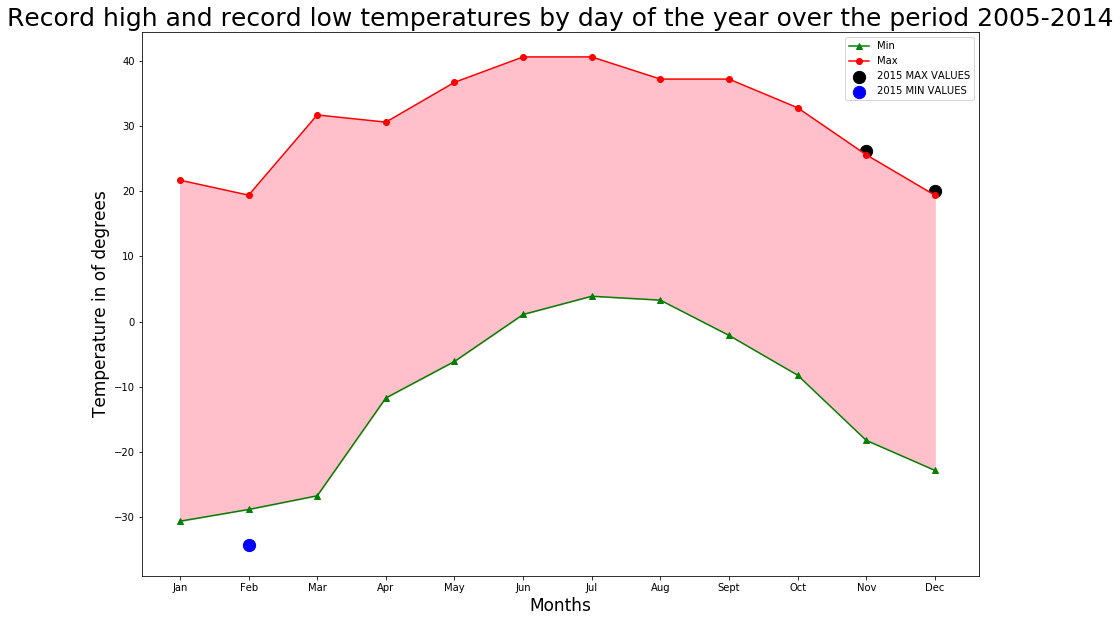

In [153]:
plt.figure(figsize=(15,10))
#line plot

plt.title('Record high and record low temperatures by day of the year over the period 2005-2014',fontsize=25)
plt.xlabel('Months',fontsize=17)
plt.ylabel('Temperature in of degrees',fontsize=17)
plt.xticks(np.arange(1,13,1),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'],fontsize=10)
plt.plot(min1.index,min1['Data_Value']/10,label='Min',marker='^',color='green')
plt.plot(max1.index,max1['Data_Value']/10,label='Max',marker='o',color='red')

plt.scatter(ans_max.index,ans_max['Data_Value']/10,s=150,c='black',label='2015 MAX VALUES') #values over max
plt.scatter(ans_min.index,ans_min['Data_Value']/10,s=150,c='blue',label='2015 MIN VALUES')

plt.fill_between(max1.index,min1['Data_Value']/10,max1['Data_Value']/10, color='pink') 
plt.legend()
plt.show()